In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import scipy.stats as st

# Generate a "population"

In [2]:
np.random.seed(719)

In [3]:
# generate a ficticious population with 1 million values
pop_mean = 53.21
pop_std = 4.23
population = np.random.normal(pop_mean, pop_std, 10**6)

In [4]:
population.shape

(1000000,)

/Users/benbogart/opt/anaconda3/envs/ml/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Population Distribution')

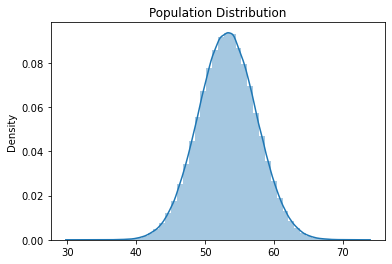

In [5]:
sns.distplot(population)
plt.title('Population Distribution')

# Draw a small sample from the population

In [6]:
sample = np.random.choice(population, size=30, replace=False)

In [7]:
sample.mean()

54.12110644012915

Text(0.5, 1.0, 'Sample Distribution')

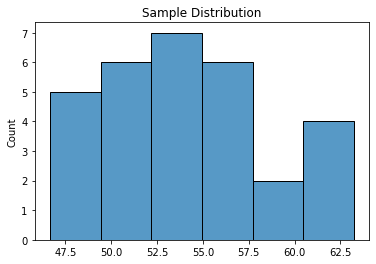

In [8]:
sns.histplot(sample)
plt.title('Sample Distribution')

# Bootstrap

In [9]:
bs = np.random.choice(sample, (len(sample), 1000), replace=True)

In [10]:
bs.shape

(30, 1000)

In [11]:
bs_means = bs.mean(axis=0)
bs_means_mean = bs_means.mean()
bs_means_mean

54.072626327248315

## Confidence interval

In [12]:
means_qtl_025 = np.quantile(bs_means, 0.025)
means_qtl_975 = np.quantile(bs_means, 0.975)

means_qtl_025, means_qtl_975

(52.41754898532445, 55.602661654526315)

If this population were drawn from many different populations 95/100 of them would have a mean between 51.48 and 55.08.

# Bootstrap the Standard Deviation

The difference here is that we will calculate the standard deviation for each sample, then take the mean of the standard deviations.

In [13]:
bs_stds = bs.std(axis=0)
bs_std_mean = bs_stds.mean()
bs_std_mean

4.398626063763372

In [14]:
std_qtl_025 = np.quantile(bs_stds, 0.025)
std_qtl_975 = np.quantile(bs_stds, 0.975)

std_qtl_025, std_qtl_975

(3.356752806683829, 5.460033411850985)

/Users/benbogart/opt/anaconda3/envs/ml/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/benbogart/opt/anaconda3/envs/ml/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Variation in mean at Confidence Intervals')

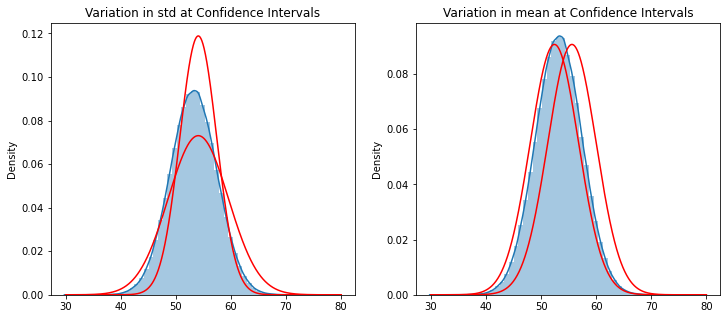

In [15]:
x = np.linspace(30, 80, 1000)

# plot the distributions with std at the confidence intervals
dist_low = st.norm(loc=bs_means_mean, scale=std_qtl_025)
y_low = dist_low.pdf(x)

dist_high = st.norm(loc=bs_means_mean, scale=std_qtl_975)
y_high = dist_high.pdf(x)


#plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

plt.sca(ax1)
sns.distplot(population, ax=ax1)
plt.plot(x,y_low, color='red')
plt.plot(x,y_high, color='red')
plt.title('Variation in std at Confidence Intervals')


# plot the distributions with mean at the confidence intervals
dist_low = st.norm(loc=means_qtl_025, scale=bs_std_mean)
y_low = dist_low.pdf(x)

dist_high = st.norm(loc=means_qtl_975, scale=bs_std_mean)
y_high = dist_high.pdf(x)

#plot
plt.sca(ax2)
sns.distplot(population)
plt.plot(x,y_low, color='red')
plt.plot(x,y_high, color='red')

plt.title('Variation in mean at Confidence Intervals')


# Try with 10 million re-samples

In [16]:
# patience, this will take some time
bs_big = np.random.choice(sample, (len(sample), 10**7), replace=True)

In [17]:
bs_means = bs_big.mean(axis=0)
bs_means_mean = bs_means.mean()
bs_means_mean

54.12096064254814

In [18]:
means_qtl_025 = np.quantile(bs_means, 0.025)
means_qtl_975 = np.quantile(bs_means, 0.975)

means_qtl_025, means_qtl_975

(52.535753878990164, 55.76684250100114)

In [19]:
bs_stds = bs_big.std(axis=0)
bs_std_mean = bs_stds.mean()
bs_std_mean

4.414164449356725

In [20]:
std_qtl_025 = np.quantile(bs_stds, 0.025)
std_qtl_975 = np.quantile(bs_stds, 0.975)

std_qtl_025, std_qtl_975

(3.3352503395296598, 5.387739215237817)

/Users/benbogart/opt/anaconda3/envs/ml/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/benbogart/opt/anaconda3/envs/ml/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Variation in mean at Confidence Intervals\n10 million re-samples')

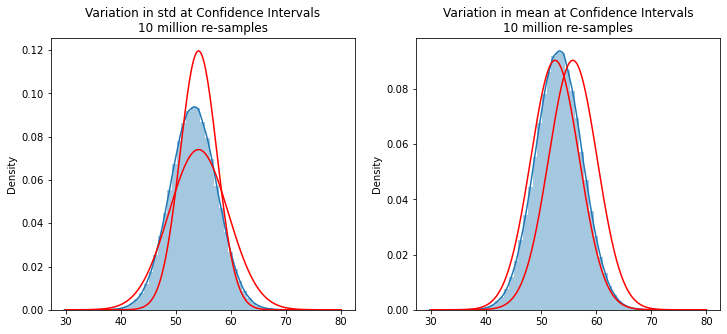

In [21]:
x = np.linspace(30, 80, 1000)

# plot the distributions with std at the confidence intervals
dist_low = st.norm(loc=bs_means_mean, scale=std_qtl_025)
y_low = dist_low.pdf(x)

dist_high = st.norm(loc=bs_means_mean, scale=std_qtl_975)
y_high = dist_high.pdf(x)


#plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

plt.sca(ax1)
sns.distplot(population, ax=ax1)
plt.plot(x,y_low, color='red')
plt.plot(x,y_high, color='red')
plt.title('Variation in std at Confidence Intervals\n10 million re-samples')


# plot the distributions with mean at the confidence intervals
dist_low = st.norm(loc=means_qtl_025, scale=bs_std_mean)
y_low = dist_low.pdf(x)

dist_high = st.norm(loc=means_qtl_975, scale=bs_std_mean)
y_high = dist_high.pdf(x)

#plot
plt.sca(ax2)
sns.distplot(population)
plt.plot(x,y_low, color='red')
plt.plot(x,y_high, color='red')

plt.title('Variation in mean at Confidence Intervals\n10 million re-samples')
